<a href="https://colab.research.google.com/github/aryarajat/Bike-Rental-Demand/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from numpy import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading the dataset
netflix_df=pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
# First look of the dataset
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# Checking the shape of the dataframe
netflix_df.shape

(7787, 12)

In [6]:
# Columns name
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
# Information about the dataset
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
# Find the various statistic for all the columns
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s4607,Movie,13TH,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


# **Data Wrangling**

In [9]:
# Here we check the duplicate observtions in our dataset
duplicate = netflix_df[netflix_df.duplicated()]

In [10]:
# Printing the duplicate observations
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


### **Observation:**
Our dataset does not contain any duplicate observations.

In [11]:
# Checking the NAN/Null values in our dataset
for i in netflix_df.columns:
    null_rate = netflix_df[i].isna().sum() / len(netflix_df) * 100 
    if null_rate > 0 :
        print("{} null values percentage: {}%".format(i,round(null_rate,2))," \n null value counts:",netflix_df[i].isna().sum())

director null values percentage: 30.68%  
 null value counts: 2389
cast null values percentage: 9.22%  
 null value counts: 718
country null values percentage: 6.51%  
 null value counts: 507
date_added null values percentage: 0.13%  
 null value counts: 10
rating null values percentage: 0.09%  
 null value counts: 7


### **Observations:** 


*   The director column has 30% null values, which is a significantly large proportion. In our analysis, these null values cause certain problems.



## **Null Value Treatment**

This is always circumstance dependent, however in this case: 

* I will replace blank countries with the mode (most common) country.

* I'd like to keep director because it can be fascinating to look at a specific filmmaker's movie. As a result, we substitute the null values with the word 'unknown' for further analysis.

* I'd like to keep the cast because it can be fascinating to look at the films of a specific cast. As a result, we substitute the null values with the word 'unknown' for further analysis.

In [12]:
# Replacing the null values in director column
netflix_df['director'].replace(np.nan, "unknown",inplace  = True)

# Checking the null values are replaced or not
netflix_df['director'].isnull().sum()

0

In [13]:
# Replacing the null values in cast column
netflix_df['cast'].replace(np.nan, "unknown",inplace  = True)

# Checking the null values are replaced or not
netflix_df['cast'].isnull().sum()

0

In [14]:
# Replacing the null values in country column
netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])

# Checking the null values are replaced or not
netflix_df['country'].isnull().sum()

0

In [15]:
# Replacing the null values in country column
netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])

# Checking the null values are replaced or not
netflix_df['rating'].isnull().sum()

0

**There are very few null entries in the date_added fields and there is no logical way to handling the dates, thus deleting them is a better alternative..**

In [16]:
# Dropping the null values
netflix_df.dropna(inplace=True)

In [17]:
# After dropping null values
netflix_df.shape

(7777, 12)

## **Let's genereate new columns for our analyis**

In [19]:
# Adding the Month-added and year_addedcolumn in our dataset
netflix_df['month_added'] = netflix_df['date_added'].apply(lambda x: x.split(" ")[0])
netflix_df['month_added'].head()

# Year_added
netflix_df['year_added'] = netflix_df['date_added'].apply(lambda x: x.split(" ")[-1])
netflix_df['year_added'].head()

0    2020
1    2016
2    2018
3    2017
4    2020
Name: year_added, dtype: object

**Obtaining the first nation name simplifies the county-by-county analysis.**

In [31]:
# Lets retrieve just the first country
netflix_df['principal_country'] = netflix_df['country'].apply(lambda x: x.split(",")[0])
netflix_df['principal_country'].head()

0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: principal_country, dtype: object


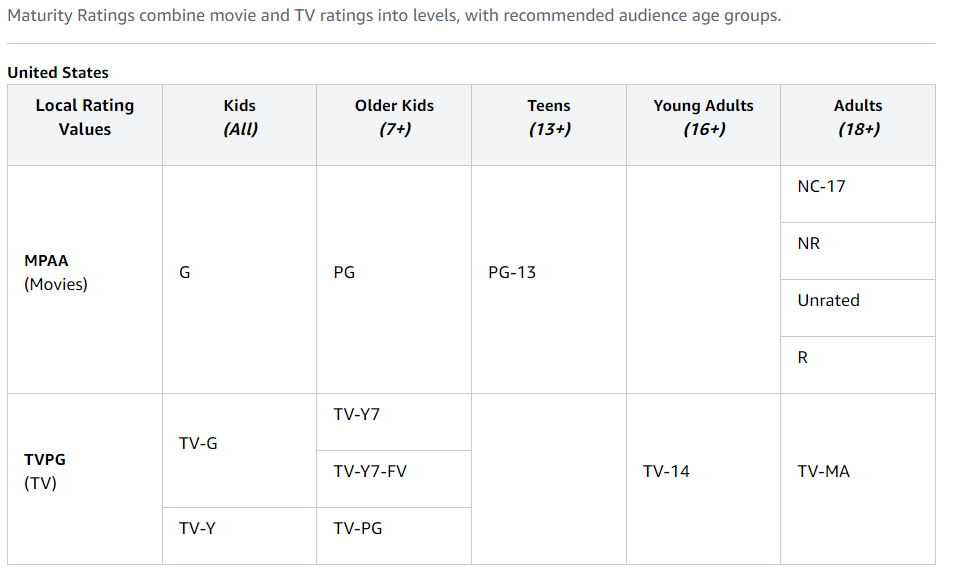

In [111]:
# Creating new column for age rating
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Young Adults',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_df['age_rating'] = netflix_df['rating'].replace(rating_ages)
netflix_df['age_rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

# **Exploratory Data Analysis(EDA)**

##**Analyze the type of content available on Netflix**

No handles with labels found to put in legend.


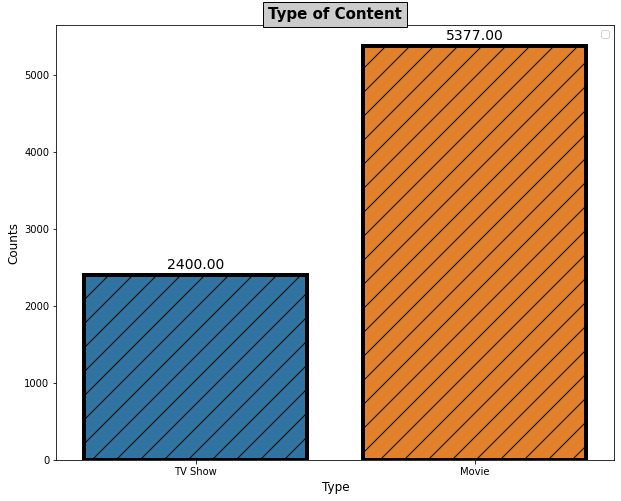

In [20]:
# Ploting the countplot
plt.figure(figsize=(10,8))
ax=sns.countplot('type',data=netflix_df,lw=4, ec='black',
                  hatch='/')
plt.title('Type of Content', fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5},)
plt.xlabel('Type',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.legend()
# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',fontsize=14)

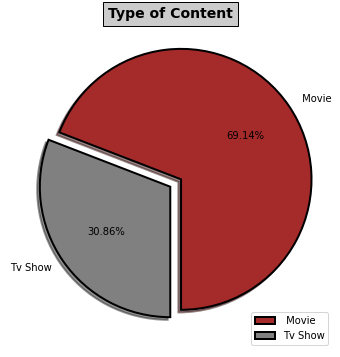

In [21]:
# Parameters for the graph
plt.figure(figsize=(8,6))
wedgeprops = {"linewidth": 2, "edgecolor":"k"}
labels = [" Movie",'Tv Show']
values = netflix_df['type'].value_counts().values

# Ploting the graph
myexplode = [0.1, 0]
colors = ['brown', 'grey']
plt.pie(values, labels=labels, autopct='%1.2f%%', shadow=True,startangle=270,
       colors=colors, explode = myexplode, wedgeprops = wedgeprops)

plt.title('Type of Content', bbox={'facecolor':'0.8', 'pad':5},
          fontsize=14, fontweight='bold')
plt.legend()
plt.show()

### **Observations:** 
* It is evident that there are more movies on Netflix than TV shows. 

* Netflix has 5377 movies, which is more than double the quantity of TV shows.

## **Movie ratings analysis**

In [52]:
netflix_df['rating'].value_counts()

TV-MA       2868
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

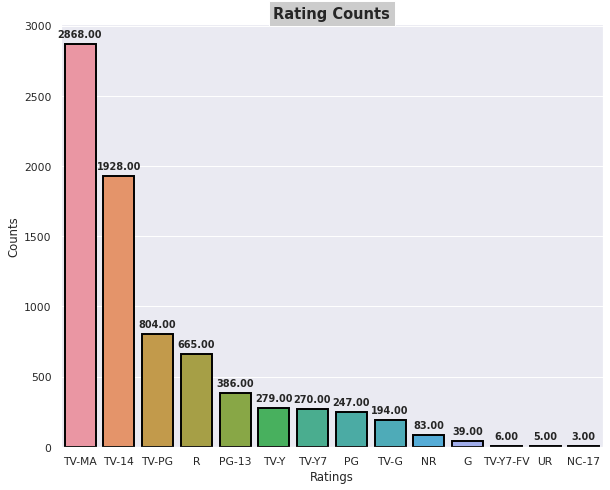

In [112]:
# Ploting the countplot for the ratings
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.countplot('rating',data=netflix_df,lw=2, ec='black',
                  order = netflix_df['rating'].value_counts().index)
plt.title('Rating Counts', fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5},)
plt.xlabel('Ratings',fontsize=12)
plt.ylabel('Counts',fontsize=12)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points',fontsize=10, fontweight='bold')

In [153]:
# Here, we define a Function that divides movie and television show ratings into age categories
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA','NR','UR']
rating_order_tv =  [ 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'TV-MA']
movie_rating = netflix_df['rating'].value_counts()[rating_order_movie]
tv_rating = netflix_df['rating'].value_counts()[rating_order_tv]

def rating_barplot1(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'Red',  'orange','yellow']
    span_range = [[0, 2], [3,  6], [7,7],[8,8], [9, 13]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Young Adults', 'Adults']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    

def rating_barplot2(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'Red',  'orange','yellow']
    span_range = [[0, 1], [2,  4], [5,5],[6,6]]
    

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Young Adults', 'Adults']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()
 

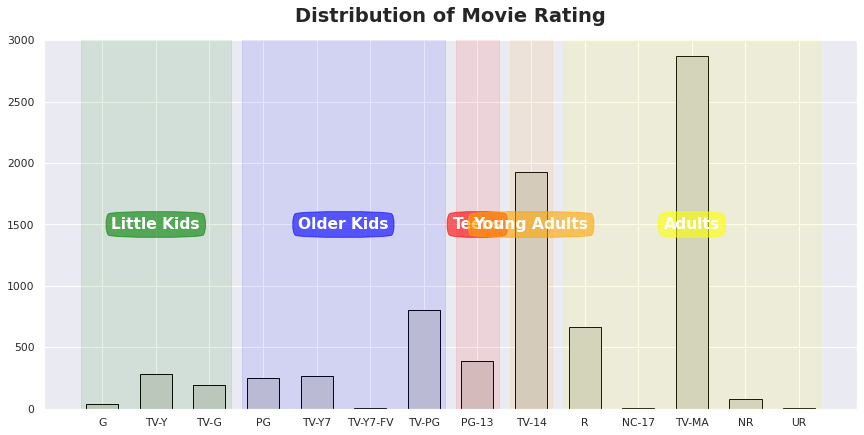

In [154]:
# Distribution of Movie Rating
rating_barplot1(movie_rating,'Movie', 1500)

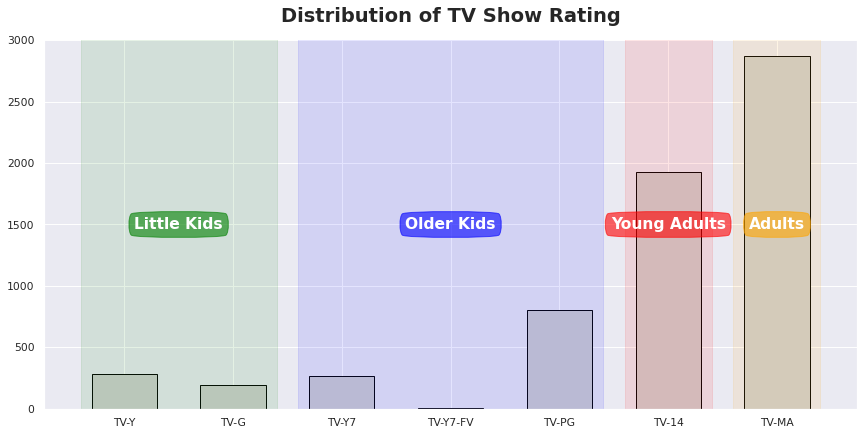

In [155]:
# Distribution of Tv Show Rating
rating_barplot2(tv_rating,'TV Show' , 1500)

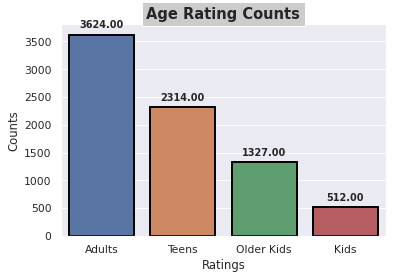

In [99]:
# Countplot for Adult, Teen, Kids, Older Kids
ax=sns.countplot('age_rating',data=netflix_df,lw=2, ec='black',
                  order = netflix_df['age_rating'].value_counts().index)
plt.title('Age Rating Counts', fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5},)
plt.xlabel('Ratings',fontsize=12)
plt.ylabel('Counts',fontsize=12)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points',fontsize=10, fontweight='bold')